In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c playground-series-s4e9

  0% 0.00/7.84M [00:00<?, ?B/s]
100% 7.84M/7.84M [00:00<00:00, 191MB/s]


In [7]:
!unzip playground-series-s4e9.zip
!rm playground-series-s4e9.zip

Archive:  playground-series-s4e9.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
!mkdir data
!mv train.csv data/
!mv test.csv data/

In [58]:
import pandas as pd

df = pd.read_csv('data/train.csv')
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [60]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [61]:
df['transmission'].value_counts()

,count
transmission,
A/T,49904
8-Speed A/T,20645
Transmission w/Dual Shift Mode,19255
6-Speed A/T,18044
6-Speed M/T,11998
7-Speed A/T,11124
Automatic,10691
8-Speed Automatic,8431
10-Speed A/T,8044


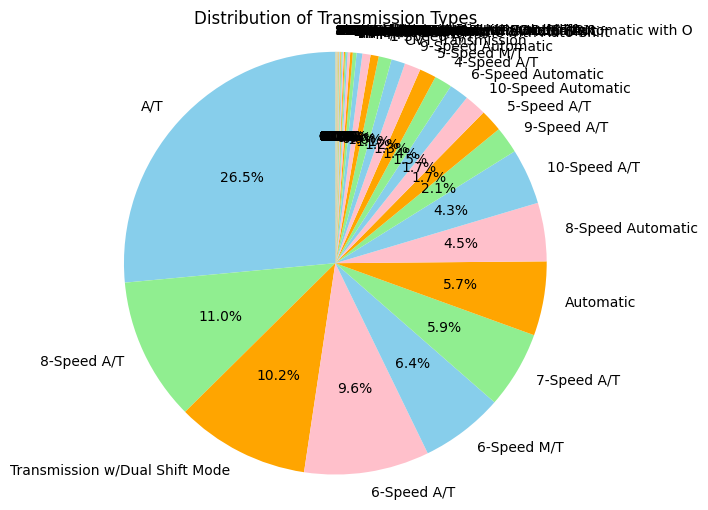

In [62]:
import matplotlib.pyplot as plt

transmission_counts = df['transmission'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Distribution of Transmission Types')
plt.axis('equal')
plt.show()


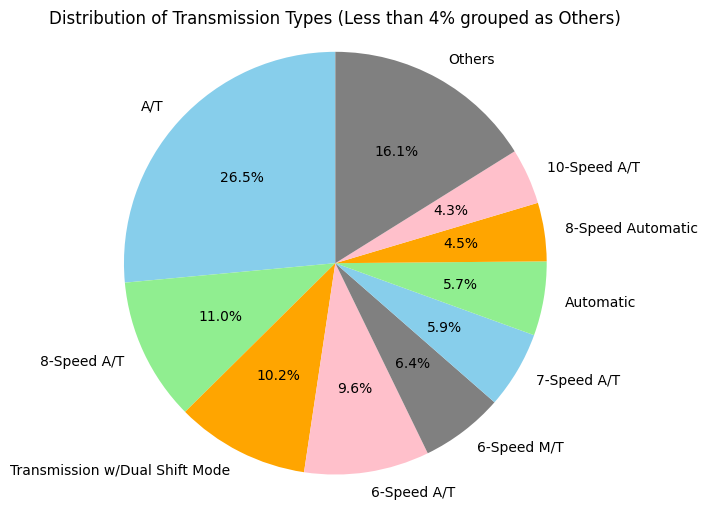

In [63]:
import matplotlib.pyplot as plt

transmission_counts = df['transmission'].value_counts()

transmission_percentage = transmission_counts / transmission_counts.sum() * 100

transmission_filtered = transmission_percentage[transmission_percentage >= 4]
transmission_filtered['Others'] = transmission_percentage[transmission_percentage < 4].sum()

plt.figure(figsize=(6, 6))
plt.pie(transmission_filtered, labels=transmission_filtered.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'pink', 'grey'])
plt.title('Distribution of Transmission Types (Less than 4% grouped as Others)')
plt.axis('equal')
plt.show()


In [64]:
null_counts = df.isnull().sum()
null_counts

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [65]:
# drop row with missing data
df_dropped_rows = df.dropna().copy()

print(f"Rows before dropping rows with missing values: {df.shape[0]}")
print(f"Rows after dropping rows with missing values: {df_dropped_rows.shape[0]}")


Rows before dropping rows with missing values: 188533
Rows after dropping rows with missing values: 162610


In [66]:
# Forward fill missing values
df_ffill = df.copy()
df_ffill.fillna(method='ffill', inplace=True)
df_ffill.isnull().sum()


<ipython-input-66-7ad6d7adfe16>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill.fillna(method='ffill', inplace=True)


,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [67]:
# Backward fill missing values
df_bfill = df.copy()
df_bfill.fillna(method='bfill', inplace=True)
df_bfill.isnull().sum()


<ipython-input-67-3fce91048a9c>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill.fillna(method='bfill', inplace=True)


,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [68]:
df_dropped_rows

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188527,188527,Chevrolet,Camaro Z28,1999,110000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,Gray,None reported,Yes,14500
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900


In [69]:
df_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  clean_title   188533 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [70]:

categorical_cols = df_dropped_rows.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    print(f"{col}: {df_dropped_rows[col].nunique()} unique values")


brand: 57 unique values
model: 1883 unique values
fuel_type: 7 unique values
engine: 1098 unique values
transmission: 52 unique values
ext_col: 312 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


In [71]:
#we have more than 50 unique values in brand so we cant one hot encode it so the best solustion is target encoding
brand_mean_price = df_dropped_rows.groupby('brand')['price'].mean()
df_dropped_rows['brand_encoded'] = df_dropped_rows['brand'].map(brand_mean_price)
df_dropped_rows.drop('brand', axis=1, inplace=True)


In [72]:
model_mean_price = df_dropped_rows.groupby('model')['price'].mean()
df_dropped_rows['model_encoded'] = df_dropped_rows['model'].map(model_mean_price)
df_dropped_rows.drop('model', axis=1, inplace=True)


In [74]:
df_dropped_rows = pd.get_dummies(df_dropped_rows, columns=['fuel_type'], drop_first=True)
df_dropped_rows = pd.get_dummies(df_dropped_rows, columns=['transmission'], drop_first=True)

In [75]:
df_dropped_rows = pd.get_dummies(df_dropped_rows, columns=['ext_col', 'int_col'], drop_first=True)

In [78]:
df_dropped_rows['accident'].value_counts()

,count
accident,
None reported,122411
At least 1 accident or damage reported,40199


In [79]:
accident_order = {'At least 1 accident or damage reported': 0, 'None reported': 1}
df_dropped_rows['accident_encoded'] = df_dropped_rows['accident'].map(accident_order)
df_dropped_rows.drop('accident', axis=1, inplace=True)

In [83]:
df_dropped_rows['clean_title'].value_counts()

,count
clean_title,
Yes,162610


In [84]:
df_dropped_rows.drop('clean_title', axis=1, inplace=True)

In [86]:
df_dropped_rows['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3448
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2873
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2801
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2430
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2422
...,...
2.0 Liter Supercharged,1
1.6L I4 16V GDI DOHC,1
500.0HP Electric Motor Electric Fuel System,1


In [87]:
import re

def extract_hp(engine_str):
    hp_match = re.search(r'(\d+)\.0HP', engine_str)
    return int(hp_match.group(1)) if hp_match else None

def extract_liters(engine_str):
    liter_match = re.search(r'(\d+\.\d+)L', engine_str)
    return float(liter_match.group(1)) if liter_match else None

def extract_cylinders(engine_str):
    cylinder_match = re.search(r'(\d+) Cylinder', engine_str)
    return int(cylinder_match.group(1)) if cylinder_match else None

df_dropped_rows['horsepower'] = df_dropped_rows['engine'].apply(extract_hp)
df_dropped_rows['displacement'] = df_dropped_rows['engine'].apply(extract_liters)
df_dropped_rows['cylinders'] = df_dropped_rows['engine'].apply(extract_cylinders)

df_dropped_rows.drop('engine', axis=1, inplace=True)


In [89]:
df_dropped_rows

,id,model_year,milage,price,brand_encoded,model_encoded,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_encoded,horsepower,displacement,cylinders
0,0,2007,213000,4200,16622.028019,12848.536585,False,True,False,False,...,False,False,False,False,False,False,1,172.0,1.6,4.0
1,1,2002,143250,4999,29616.018576,12663.379310,False,True,False,False,...,False,False,False,False,False,False,0,252.0,3.9,8.0
2,2,2002,136731,13900,40316.258273,24172.333333,True,False,False,False,...,False,False,False,False,False,False,1,320.0,5.3,8.0
3,3,2017,19500,45000,52206.617433,47662.954023,False,True,False,False,...,False,False,False,False,False,False,1,420.0,5.0,8.0
4,4,2021,7388,97500,48433.762492,58724.811111,False,True,False,False,...,False,False,False,False,False,False,1,208.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188527,188527,1999,110000,14500,40316.258273,18310.449367,False,True,False,False,...,False,False,False,False,False,False,1,310.0,5.7,8.0
188528,188528,2017,49000,27500,44454.666051,51179.225275,False,True,False,False,...,False,False,False,False,False,False,1,420.0,6.2,8.0
188529,188529,2018,28600,30000,48433.762492,56414.915789,False,True,False,False,...,False,False,False,False,False,False,0,385.0,3.0,6.0
188530,188530,2021,13650,86900,48433.762492,68225.469388,False,True,False,False,...,False,False,False,False,False,False,1,469.0,4.0,8.0


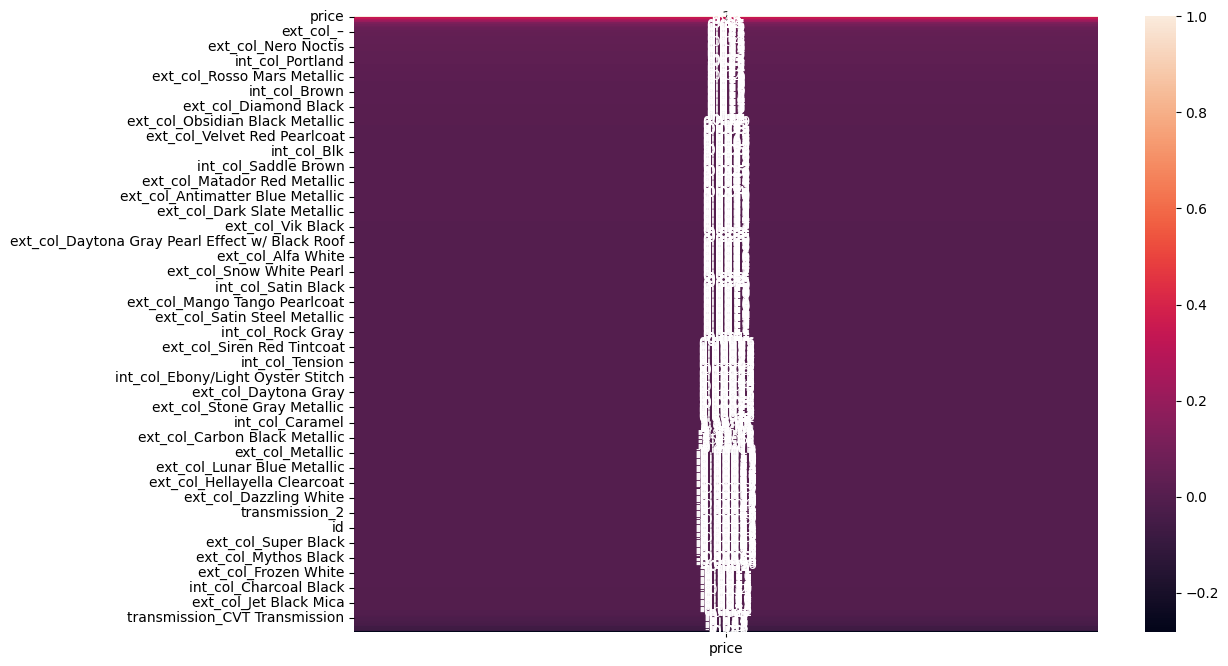

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_dropped_rows.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True)
plt.show()


In [98]:
df_dropped_rows['horsepower'].fillna(df_dropped_rows['horsepower'].mean(), inplace=True)
df_dropped_rows['displacement'].fillna(df_dropped_rows['displacement'].mean(), inplace=True)

df_dropped_rows['cylinders'].fillna(df_dropped_rows['cylinders'].median(), inplace=True)


<ipython-input-98-e86088c7581e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped_rows['horsepower'].fillna(df_dropped_rows['horsepower'].mean(), inplace=True)
<ipython-input-98-e86088c7581e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [99]:
# Fill missing values with the mode for cylinders
df_dropped_rows['cylinders'].fillna(df_dropped_rows['cylinders'].mode()[0], inplace=True)


<ipython-input-99-63a6e0c0d769>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped_rows['cylinders'].fillna(df_dropped_rows['cylinders'].mode()[0], inplace=True)


In [100]:
missing_values_after = df_dropped_rows[['horsepower', 'displacement', 'cylinders']].isnull().sum()
missing_values_after


,0
horsepower,0
displacement,0
cylinders,0


In [101]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numerical_cols = ['milage', 'horsepower', 'displacement']

scaler = StandardScaler()

df_dropped_rows[numerical_cols] = scaler.fit_transform(df_dropped_rows[numerical_cols])


In [102]:
df_dropped_rows.isnull().sum()

,0
id,0
model_year,0
milage,0
price,0
brand_encoded,0
...,...
int_col_–,0
accident_encoded,0
horsepower,0
displacement,0


In [103]:
from sklearn.model_selection import train_test_split

X = df_dropped_rows.drop('price', axis=1)
y = df_dropped_rows['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [105]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6156730488.095436


In [106]:
import numpy as np

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 78464.83599737806
